
## FINANCIAL ECONOMETRICS
MODULE 3 | LESSON 2

---

# **SKEW NORMAL DISTRIBUTION AND SKEW-T DISTRIBUTION**

|  |  |
|:---|:---|
|**Reading Time** | 60 minutes |
|**Prior Knowledge** | Basic Statistics  |
|**Keywords** | Skewness, Kurtosis, Skew Normal Distribution, Skew-t Distribution |


---<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

*In the last lesson, we visited the concepts of random variables and reviewed the basics of some common probability distributions. The most utilized distribution in many applications is the normal distribution. The normal distribution has a symmetric shape and properties that are easy to use for data analysis. However, in the real world, the observed data does not always have a bell-shaped distribution. The data may cluster on the right or the left of the whole data range. We usually call this kind of data distribution skewed to the right or to the left. In this lesson, we will look at the skewed data and learn how to measure the skewness. Apart from skewness, we will also learn what is a heavy tail or a light tail of a data distribution and how to measure it. Then, we will introduce skew normal distribution and its families. This is a distribution for observed data that exhibits some properties of a normal distribution but does not have the symmetric shape or similar tail pattern. Throughout this lesson, we will use the U.S. 10-Year Treasury Bond Yield daily return and the Dow Jones Industrial Index daily return for each technique we cover.*

In [ ]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import kurtosis, skewnorm

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [ ]:
# Download the dataset
data_set = pd.read_csv("../M3. bond_and_stock_data.csv")

## **1. Skewness**

A skew distribution means that the probability distribution is not symmetric. We usually draw a histogram from a dataset to inspect for skewness. In figure 1 below, the graph contains three histograms. The one in the middle is a histogram for a dataset sampled from a normal distribution. Normal distributions are symmetric distributions. We notice that the peak is located at the center of the distribution. The histogram on the lower left of the figure exhibits a right-skewed distribution. A right-skewed distribution has a longer tail, which extends to the right of the plot. The peak of a right-skewed distribution is located on the left region of the distribution. Finally, the histogram on the lower right of the figure is that of a left-skewed distribution. A left-skewed distribution has a longer tail, which extends to the left of the plot. The peak of a left-skewed distribution is found in the right region of the distribution. 


**Figure 1: Histograms of Normal Distribution, Right-Skew Distribution, and Left-Skew Distribution**


In [ ]:
# Histograms of Normal Distribution, Right-Skew and Left-Skew Distributions


# Helper HistogramPlot function
def HistogPlot(a, label):
    # np.random.seed(12345)
    r = skewnorm.rvs(a, size=500)
    x = np.linspace(skewnorm.ppf(0.001, a), skewnorm.ppf(0.999, a), 100)
    plt.plot(x, skewnorm.pdf(x, a), "r-", lw=2, alpha=0.7, label=label)  # Density
    plt.hist(r, bins=20, density=True, histtype="stepfilled", alpha=0.5)  # Histogram
    plt.legend()


# Plot
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(131)
HistogPlot(5, "Right Skew Dist")  # Right Skew a>0
ax2 = plt.subplot(132)
HistogPlot(0, "Normal Dist")  # Normal Dist. a=0
ax3 = plt.subplot(133)
HistogPlot(-5, "Left Skew Dist")  # Left Skew a<0
plt.show()

One quick way to check if the data is skewed is to check the order of the mean, median, and mode of the data. The **mean** is the average of the data. The **median** is the value of the data point(s) at the 50th percentile of the data ordered from smallest to largest. The **mode** is the value of the data that shows up most frequently in the dataset. Figure 2 below shows different relationships among these three metrics for symmetric, right-skew and left-skew distributions.


**Figure 2: Mean, Median, and Mode Relationships for Symmetric, Right-Skew and Left-Skew Distributions**


In [ ]:
# Mean, Median, and Mode Relationships for Symmetric, Right-Skew and Left-Skew Distributions


# Helper HistogramPlot function
def HistogPlot(a, label):
    np.random.seed(123)
    r = skewnorm.rvs(a, size=500)
    x = np.linspace(skewnorm.ppf(0.0001, a), skewnorm.ppf(0.9999, a), 500)
    plt.plot(x, skewnorm.pdf(x, a), "r-", lw=2, alpha=0.7, label=label)  # Density
    n, bins, patches = plt.hist(
        r, bins=20, density=True, histtype="stepfilled", alpha=0.5
    )  # Histogram

    # Add Mean
    plt.axvline(x=np.mean(r))
    plt.text(np.mean(r), 0.1, "Mean", rotation=90)

    # Add Median
    plt.axvline(x=np.median(r))
    plt.text(np.median(r), 0.2, "Median", rotation=90)

    # Add Mode (by the most frequent bin)
    plt.axvline(x=(bins[n.argmax()] + bins[n.argmax() + 1]) / 2)
    plt.text((bins[n.argmax()] + bins[n.argmax() + 1]) / 2, 0.3, "Mode", rotation=90)
    plt.legend()


# Plot
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(131)
HistogPlot(5, "Right Skew Dist")
ax2 = plt.subplot(132)
HistogPlot(0, "Normal Dist")
ax3 = plt.subplot(133)
HistogPlot(-5, "Left Skew Dist")
plt.show()

As we just saw, we can visually assess the skewness of a dataset via histograms. Alternatively, we can also use the relationship among the mean, median, and mode to decide if the data is skewed. However, is there a measurement to tell us if a dataset is skewed? Yes, there are measurements that can tell us if a dataset is skewed. Here's a popular one from many textbooks.

Fisher-Pearson Standardized Moment Coefficient (skewness): 

$$ \sum_{i=1}^{n}\frac{(X_{i}-\bar{X})^{3}/n}{s_{X}^{3}} $$

Where $\bar{X}$ is the mean of $X$ and s is the standard deviation of $X$

The properties of this test coefficient are:

> 1. A symmetric distribution will have value = $0$. A negative value indicates a left-skew distribution. A positive value indicates a right-skew distribution.
> 2. The coefficient compares the data with a normal distribution. The larger the value of the coefficient, the more the data deviates from normal distribution.
> 3. The metric can be adjusted for sample size by multiplying $\frac{\sqrt{n(n-1)}}{n-2}$. When the sample size is large, this adjustment factor approaches $1$.

Most statistical software can calculate the skewness for us, and therefore, we do not have to calculate the number by hand.

## **2. Kurtosis**

Kurtosis is another measure used to decide the shape of the distribution of a dataset. Kurtosis allows us to decide if the tails of a distribution are heavier or lighter than the tails of a normal distribution. What does it mean to have a heavy tail? In general, a distribution that has a fatter tail or a longer tail than a normal distribution will be called a distribution with a heavy tail. In figure 3, below, we will show three different distributions with different tail shapes.


**Figure 3: Probability Functions with Different Tails Compared to a Normal Distribution**


In [ ]:
# Three distributions with different tail shapes
x = np.linspace(0, 60, 100)
y1 = stats.norm.pdf(x, loc=30, scale=2.450)
y2 = stats.norm.pdf(x, loc=30, scale=3.194)
y3 = stats.norm.pdf(x, loc=30, scale=4.450)

# Plot each distribution
plt.figure(figsize=(12, 7))
plt.plot(x, y1, c="b", label="Heavy tail: Kurtosis={:.2f}".format(kurtosis(y1)))
plt.plot(x, y2, c="r", label="Normal:     Kurtosis={:.2f}".format(kurtosis(y2)))
plt.plot(x, y3, c="k", label="Light tail:   Kurtosis={:.2f}".format(kurtosis(y3)))
plt.legend()
plt.show()

From figure 3, the red curve is a normal distribution. We can see all three distributions are symmetric distributions centered around 30. However, compared to the normal distribution, the blue-curve distribution exhibits a higher peak around 30. This means that the blue-curve assigns a higher probability than normal distribution around 30. However, the blue-curve distribution assigns less probability than a normal distribution in the region of (20, 26) and (34, 40). Also, the blue-curve distribution has higher probability than the normal distribution on both ends of the curve. **Higher peak, skinnier body, and longer tails than normal distribution make the blue-curve distribution a heavy tail distribution**. On the other hand, the black-curve distribution has a lower peak than normal distribution around 30. The black-curve distribution has higher probability than normal distribution in the region of (16, 26) and (34, 44) and has lower probability and shorter tails on both ends of the curve compared to normal distribution. **Lower peak, fatter body, and shorter tails than normal distribution makes the black-curve distribution a light tail distribution**.

By the tail shape of a symmetric distribution, a normal distribution is called **mesokurtic**. A fat tail distribution is called **leptokurtic**. A light tail distribution is called **platykurtic**.

There is a formal kurtosis formula as follows:

$$  \text{Kurtosis} = \sum_{i=1}^{n} \frac{(X_{i}-\bar{X})^{4}/N}{s^{4}}$$

A normal distribution has a kurtosis = $3$. A fat tail distribution has a kurtosis > $3$. A thin tail distribution has a kurtosis < $3$. Any statistical application has a function to calculate kurtosis. Some statistical applications can mean excess kurtosis as kurtosis. **Excess kurtosis** is $\textit{kurtosis} – 3$. When a distribution with excess kurtosis = $0$, this distribution is a normal distribution. Be sure to check the selected statistical application's manual to verify the definition of kurtosis used in the application.

Both skewness and kurtosis are aimed to help us better understand the shape of a data distribution. If we want to check whether a dataset is normally distributed, we can draw the graph and check its skewness and kurtosis. However, the best way is to conduct a Shapiro–Wilk test, as described in the last lesson. 

## **3. Skew-Normal Distribution and Skew-t Distribution**

In the previous sections, we talked about skew data and heavy tail data. We learned from Module 1 that we can transform non-normally distributed data into normally distributed data for regression analysis. However, there are times we do not want to transform the data and want to keep its original scale for analysis. In this case, we need to find a method that we can use to directly analyze a non-normal dataset. As Azzalini and Capitanio summarized in [their book The Skew-Normal and Related Families](), skew-normal distribution and skew-t distribution are used to handle skew and/or heavy tail data. Specifically, normal distribution is a special case for skew-normal distribution. In this section, we are going to give an overview of the skew-normal distribution and skew-t distribution. Then, we will present an example to show how we can apply these distributions to regression analysis.


### **3.1 The Basics of Skew-Normal Distribution**

A **skew-normal distribution** is a distribution that is not a symmetric distribution but has the shape of a normal distribution. When you check your data and it exhibits the above characteristics, you can try to use skew-normal distribution. Normal distribution is actually a special case for skew-normal distribution. We will talk about that later. 


**Figure 4: Simulated Skew-Normal Distributions with Different Shape Parameters**


In [ ]:
# Simulated Skew-Normal Distributions with Different Shape Parameters
plt.figure(figsize=(12, 7))
x = np.linspace(0, 60, 100)

alpha = 5
plt.plot(
    x,
    stats.skewnorm.pdf(x, alpha, loc=30, scale=7),
    c="g",
    label="alpha= {:.2f}".format(alpha),
)

alpha = 0
plt.plot(
    x,
    stats.skewnorm.pdf(x, alpha, loc=30, scale=7),
    c="r",
    label="alpha= {:.2f}".format(alpha),
)

alpha = -5
plt.plot(
    x,
    stats.skewnorm.pdf(x, alpha, loc=30, scale=7),
    c="k",
    label="alpha={:.2f}".format(alpha),
)
plt.legend()
plt.show()

According to Azzalini and Capitanio, if $X$ is a continuous random variable, its skew-normal density function is as follows:

$$ f(x) = 2 \phi(X) \Phi(\alpha x) $$

Where $\alpha$ is a predetermined parameter 

And $$ \phi(x) = \frac{exp(-\frac{x^{2}}{2})}{\sqrt{2\pi }} $$

And $$ \Phi(\alpha x) = \int_{-\infty }^{\alpha x} \phi(t) dt $$

$\phi(x)$ is the standard normal density function and $\Phi(\alpha x)$ is the standard normal (cumulative) distribution function. $\alpha$ is a **shape parameter**. Figure 4 shows skew-normal distributions with different $\alpha$'s. Here are some properties about $\alpha$:

> - When $\alpha = 0$, skew-normal distribution is standard normal distribution (red curve in figure 4).
> - When $\alpha > 0$, skew-normal distribution is a right-skew distribution (green curve in figure 4).
> - When $\alpha < 0$, skew-normal distribution is a left-skew distribution (black curve in figure 4).
> - When $|\alpha|$ increases, the peak of the distribution will move farther to either the right side or left side.

Skew-normal distribution and its related distribution families are heavy on math calculations. One tricky part is that skew-normal has two ways to express its parameters: **direct parameters** (DP) and **centered parameters** (CP). They exist due to maximum likelihood optimization calculations. We will not go into detail about these technicalities here. Let's talk about what they are and what we need to pay attention to when using them with skew-normal distribution.

Let's assume random variable $X$ has a skew-normal distribution with mean = $\mu$, standard deviation = $\sigma$, skewness = $\gamma _{1}$, we can denote $X$ as follows:

**Centered Parameters Method (CP)**: 

$$ X \sim SN(\mu,\sigma,\gamma_{1}) $$ 

Where  $-0.995 < \gamma_{1} < 0.995$

**Direct Parameters Method (DP)**: 

$$ X \sim SN(\xi, \omega, \alpha ) $$

Where $\xi$ is location parameter, $\omega$ is scale parameter and $\alpha$ is shape parameter

There are functions to convert centered parameters to direct parameters and vice versa in most statistical applications. Therefore, you do not need to convert them by hand. We are more familiar with elements in the centered parameters method and their interpretation. You can always start from CP and then use the selected application to convert them to DP. Before you use any skew-normal distribution functions with your selected statistical application, make sure you understand what form of inputs (CP or DP) the function takes. 


<div class="alert alert-info">
    
**NOTE:** Demonstration examples for the second part of this lesson are implemented in R software packages, which is why screenshots of R code and output are included here. A file with all the R code for this lesson is also provided. 
   </div>

### **3.2 U.S. 10-Year Treasury Bond Yield Daily Return and Skew-Normal Distribution**

We talked about the basics of skew-normal distribution in the last section. Now let's apply this method to our U.S. 10-Year Treasury Bond Yield Daily Return data. The data spans from the beginning of 2016 to the end of 2021. Here are some statistics from the data.

**Figure 5: Key Statistics for U.S. 10-Year Treasury Bond Yield Daily Return**

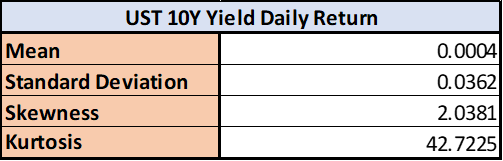

**Figure 6: QQ Plot Normal Distribution vs U.S. 10-Year Treasury Bond Yield Daily Return**

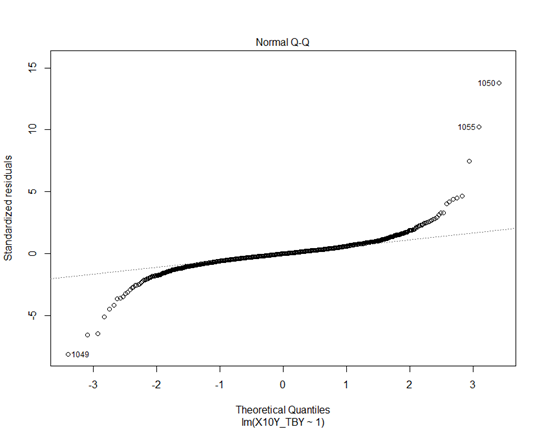

From figure 5, we can see that the U.S. Treasury 10-Year Bond Yield daily return is skewed to the right and has a heavy tail. Figure 6 also shows the U.S. Treasury 10-Year Bond Yield daily return has heavy tails on both ends compared to a normal distribution. Hence, normal distribution is not a good choice to describe the variable. 

Now let's try skew-normal distribution on the U.S. Treasury 10-Year Bond Yield daily return to see if the distribution fits the data. Figure 7 show the result.

**Figure 7: QQ Plot Skew-Normal Distribution vs U.S. Treasury 10-Year Bond Yield Daily Return**

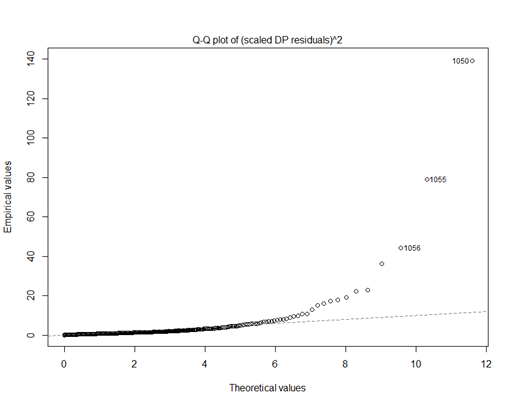

From figure 7, we can see that skew-normal distribution fits the data better on the left side of the graph. However, there are still some large outliers on the right side that skew-normal distribution cannot catch.

Now let's proceed to run a simple regression to understand the impact of the Dow Jones Industrial Average Index daily return on the U.S. Treasury 10-Year Bond Yield daily return. Our dependent variable will be the U.S. Treasury 10-Year Bond Yield daily return and our independent variable will be the Dow Jones Industrial Average Index daily return. We will run one simple regression model with a normal dependent variable setting and one with a skew-normal dependent variable setting. We then compare the QQ plots for the respective residuals. Figure 8 shows the normal least square model result.

**Figure 8: Least Square Model Result**

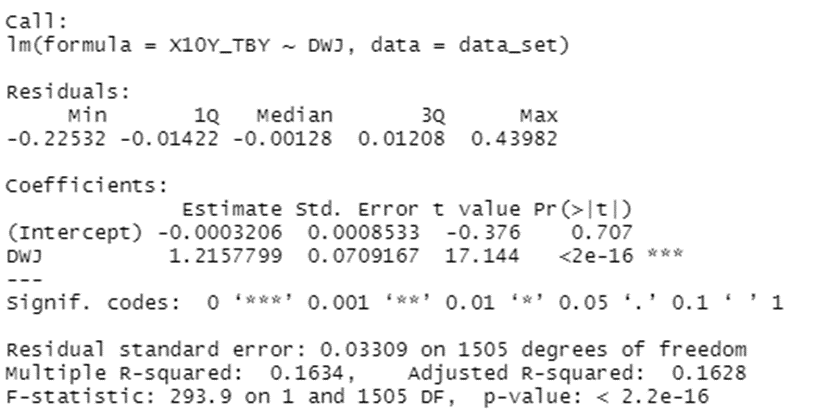



**Figure 9: Skew-Normal Regression Result**

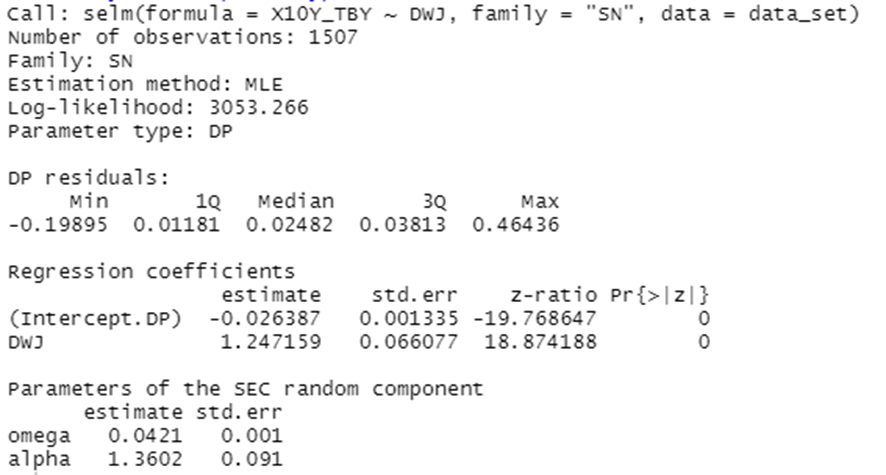



From figures 8 and 9, we can see the coefficient for the Dow Jones Industrial Average Index daily return from our least square regression is 1.216, and from our skew-normal regression, it is 1.247. The alpha from skew-normal regression is 1.36, which means that the dependent variable is skewed to the right. Now, let's compare the QQ plots from our least square and skew-normal regressions.

**Figure 10: QQ Plots for Residuals from Normal Regression and for Residuals from Skew-Normal Regression**

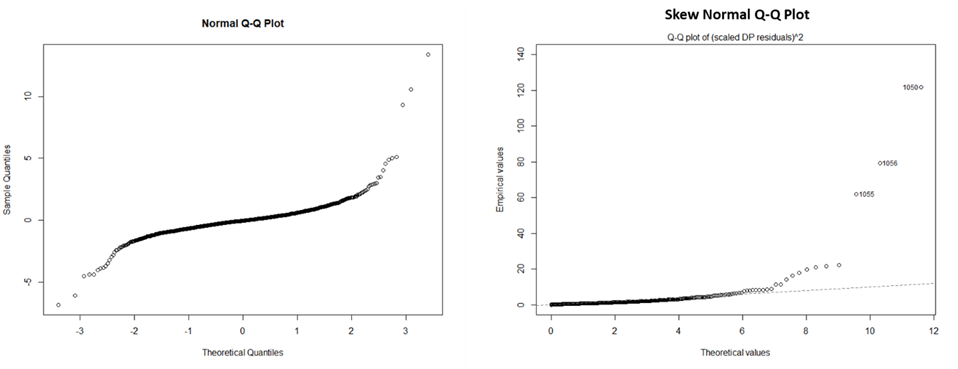

Figure 10 shows the QQ plots for residuals for two models. The scales of the two QQ plots are different because of the CP-DP adjustment in skew-normal distribution. The interpretation is still the same. From the normal (least square) QQ plot on the left, we can see the data are all curvy on both ends of the graph. Only the middle part follows a straight line. However, the skew-normal QQ plot on the right seems to have a better fit. The left end of the data also fits well with the straight line. Only to the right of the graph do we see that the data curves up. We see this phenomenon because the actual data has a thicker right tail than a normal distribution. In the next section, we will introduce skew-t distribution to be able to handle heavier tails.

### **3.3 The Basics of Skew-t Distribution**

A skew-t distribution is like a Student's t-distribution with the flexibility to adjust for the heaviness of the tails. Student's t-distribution is a symmetric distribution that has heavier tails than normal distribution. Usually Student's t-distribution is used when the data distribution is symmetric but the tails are thicker or longer than Normal distribution. In this section, we are going to introduce a distribution that is like Student's t-distribution but can both handle skewness and kurtosis. This is skew-t distribution.



**Figure 11: Simulated Skew-t Distributions with Different Degrees of Freedom**

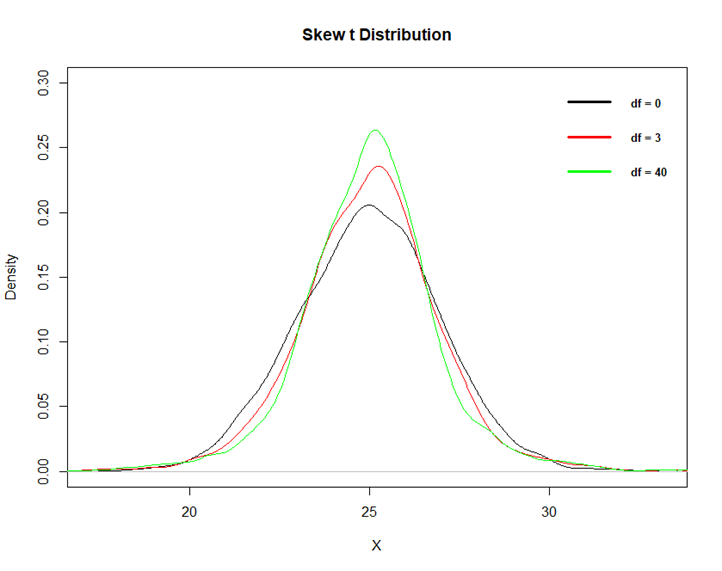

If X is a continuous random variable, it's skew-t density function is as follows:

$2t(X;\nu )T(\alpha X;\nu )$

Where $\nu$ is degree of freedom 

And $ t(X;\nu )$ is the probability density function for Student's-t distribution

And $ T(\alpha X;\nu )$ is the cumulative probability distribution function for Student's t-distribution.

Figure 11 shows three skew-t distributions with different degrees of freedom. The degree of freedom is a parameter for skew-t distribution to adjust the thickness of the tails. As the degree of freedom increases, the peak of the distribution gets thinner and the tails get heavier. Here are some properties of skew-t distribution:

When $\alpha$ =0, skew-t distribution reduces to Student's t-distribution.

When $ \nu\to \infty $, skew-t distribution reduces to skew normal distribution

When $\alpha$ =0 and $ \nu\to \infty $, skew-t distribution reduces to standard normal distribution.

Similar to skew-normal distribution, skew-t distribution also has a CP-DP conversion adjustment. Let's look at skew-t distribution's CP and DP. Assume random variable X has a skew-t distribution with mean = $\mu$, standard deviation = $\sigma$, skewness = $\gamma _{1}$ and kurtosis = $\gamma_{2}$, and we can denote X as follows:

Centered Parameters Method (CP): $ X\sim ST(\mu ,\sigma ,\gamma _{1},\gamma_{2})$ 

Where $\gamma _{1}$ < 0.995

Direct Parameters Method (DP): $X\sim ST(\xi ,\omega ,\alpha,\nu )$

Where $\xi$ is location parameter, $\omega$ is scale parameter, $\alpha$ is shape parameter and $\nu$ is degree of freedom

Any statistical application can convert CP to DP and vice versa for skew-t distribution.


### **3.4 U.S. 10-Year Treasury Bond Yield Daily Return and Skew-t Distribution**

We tried to use skew-normal to fit the U.S. 10-Year Treasury Bond Yield Daily Return data in the last section. However, skew-normal distribution cannot describe well the heavy right tail nature of the U.S. 10-Year Treasury Bond Yield Daily Return data. In this section, let's try skew-t distribution to see if this distribution can do a better job.

**Figure 12: QQ Plot Skew-t Distribution vs. U.S. Treasury 10-Year Bond Yield Daily Return**

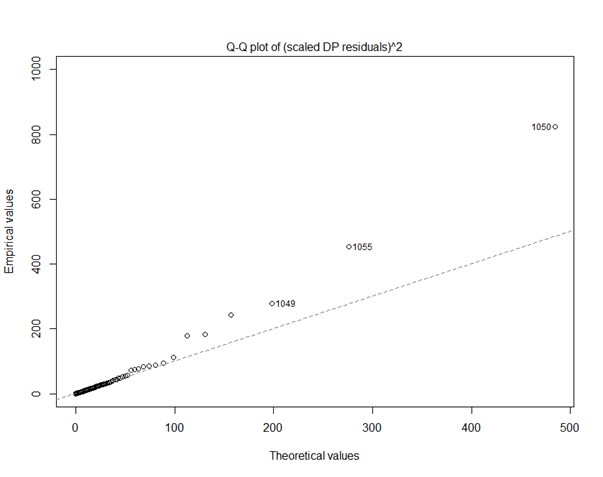

From figure 12, we can see more data points rest on the straight line for the skew-t distribution QQ plot than the skew-normal distribution QQ plot in Figure 7. Skew-t distribution fits the U.S. Treasury 10-Year Bond Yield daily return data better than skew-normal distribution. There are fewer data points not on the straight line for skew-t distribution.

Now let's run skew-t distribution regression of the U.S. Treasury 10-Year Bond Yield daily return on the Dow Jones Industrial Average daily return. Figure 13 shows the result from skew-t distribution regression.

**Figure 13: Skew-t Distribution Regression Result**

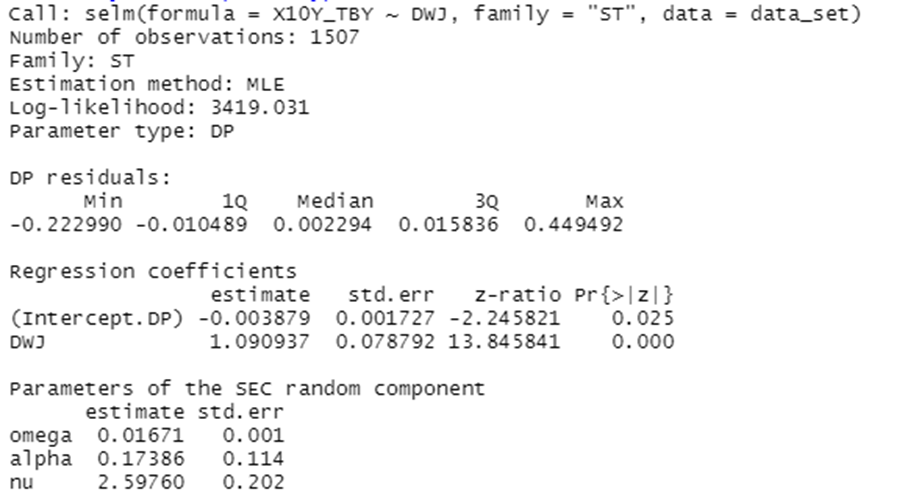

**Figure 14: QQ Plots for Residuals from Skew-Normal Regression and for Residuals from Skew-t Regression**

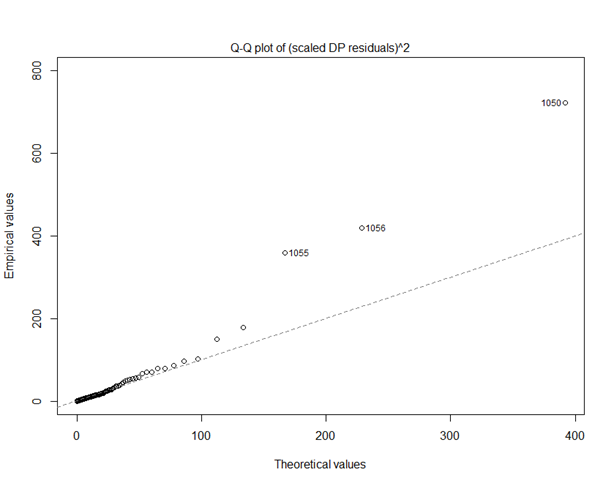

From Figure 14, we can see skew-t distribution has a better regression fit for the right side of the regression residuals QQ plot than skew-normal distribution regression does. Also, the coefficient for the Dow Jones Industrial Average index daily return is much smaller (1.091 from figure 13) than in skew-normal distribution. It is more evidence that we should properly model the thicker tail for underlying data.

## **4. Conclusion**

In this lesson, we discussed what skewness and kurtosis are. We talked about the patterns of skewness and its measurement. We also talked about the patterns of kurtosis and its measurement. Built on the knowledge of skewness and kurtosis, we introduced skew normal distribution and skew-t distribution to handle normal distribution like a dataset but with skewness and thick tails. We went through the basics of skew normal distribution and skew-t distribution. We then applied these distributions to our U.S. Treasury Bond Yield and U.S. stock index example. In the next lesson, we will explore the metrics to calculate relationships among random variables. 

---

## **References**

- Azzalini, Adelchi, and Antonella Capitanio. The Skew-Normal and Related Families. Cambridge University Press, IMS Monographs Series, 2014.


---
Copyright 2023 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
